In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from IPython.display import display, HTML
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import datasets
from scipy import stats

In [5]:
def confusion_table(confusion_mtx):
    """Renders a nice confusion table with labels"""
    confusion_df = pd.DataFrame({'y_pred=0': np.append(confusion_mtx[:, 0], confusion_mtx.sum(axis=0)[0]),
                                 'y_pred=1': np.append(confusion_mtx[:, 1], confusion_mtx.sum(axis=0)[1]),
                                 'Total': np.append(confusion_mtx.sum(axis=1), ''),
                                 '': ['y=0', 'y=1', 'Total']}).set_index('')
    return confusion_df

def total_error_rate(confusion_matrix):
    """Derive total error rate from confusion matrix"""
    return 1 - np.trace(confusion_mtx) / np.sum(confusion_mtx)

In [16]:
import pandas as pd
default_df = pd.read_csv('Default.csv', index_col='Unnamed: 0')
default_df = default_df.reset_index().drop('index', axis=1)

# Check for missing
assert default_df.isna().sum().sum() == 0

# Rationalise types
default_df = pd.get_dummies(default_df, dtype=np.float64).drop(['default_No', 'student_No'], axis=1)

display(default_df.head())

,balance,income,default_Yes,student_Yes
0,729.526495,44361.625074,0.0,0.0
1,817.180407,12106.134700,0.0,1.0
2,1073.549164,31767.138947,0.0,0.0
3,529.250605,35704.493935,0.0,0.0
4,785.655883,38463.495879,0.0,0.0


In [19]:
for s in range(1,4):
    display(HTML('<h3>Random seed = {}</h3>'.format(s)))
    # Create index for 50% holdout set
    np.random.seed(s)
    train = np.random.rand(len(default_df)) < 0.5
    
    response   = 'default_Yes'
    predictors = ['income', 'balance']
    
    X_train = np.array(default_df[train][predictors])
    X_test  = np.array(default_df[~train][predictors])
    y_train = np.array(default_df[train][response])
    y_test  = np.array(default_df[~train][response])
    
    # Logistic regression
    logit       = LogisticRegression()
    model_logit = logit.fit(X_train, y_train)
    
    # Predict
    y_pred = model_logit.predict(X_test)
    
    # Analysis
    confusion_mtx = confusion_matrix(y_test, y_pred)
    display(confusion_table(confusion_mtx))
    
    total_error_rate_pct = np.around(total_error_rate(confusion_mtx) * 100, 4)
    print('total_error_rate: {}%'.format(total_error_rate_pct))

,y_pred=0,y_pred=1,Total
,,,
y=0,4846,0,4846
y=1,164,0,164
Total,5010,0,


total_error_rate: 3.2735%


,y_pred=0,y_pred=1,Total
,,,
y=0,4691,1,4692
y=1,176,0,176
Total,4867,1,


total_error_rate: 3.636%


,y_pred=0,y_pred=1,Total
,,,
y=0,4773,1,4774
y=1,163,0,163
Total,4936,1,


total_error_rate: 3.3219%


In [21]:
for s in range(1,4):
    display(HTML('<h3>Random seed = {}</h3>'.format(s)))
    # Create index for 50% holdout set
    np.random.seed(s)
    train = np.random.rand(len(default_df)) < 0.5
    
    response   = 'default_Yes'
    predictors = ['income', 'balance', 'student_Yes']
    
    X_train = np.array(default_df[train][predictors])
    X_test  = np.array(default_df[~train][predictors])
    y_train = np.array(default_df[train][response])
    y_test  = np.array(default_df[~train][response])
    
    # Logistic regression
    logit       = LogisticRegression()
    model_logit = logit.fit(X_train, y_train)
    
    # Predict
    y_pred = model_logit.predict(X_test)
    
    # Analysis
    confusion_mtx = confusion_matrix(y_test, y_pred)
    display(confusion_table(confusion_mtx))
    
    total_error_rate_pct = np.around(total_error_rate(confusion_mtx) * 100, 4)
    print('total_error_rate: {}%'.format(total_error_rate_pct))

,y_pred=0,y_pred=1,Total
,,,
y=0,4846,0,4846
y=1,164,0,164
Total,5010,0,


total_error_rate: 3.2735%


,y_pred=0,y_pred=1,Total
,,,
y=0,4691,1,4692
y=1,176,0,176
Total,4867,1,


total_error_rate: 3.636%


,y_pred=0,y_pred=1,Total
,,,
y=0,4773,1,4774
y=1,163,0,163
Total,4936,1,


total_error_rate: 3.3219%


In [69]:
import pandas as pd
def compare_array_lengths(array1, array2):
    if len(array1) != len(array2):
        print("Error: Arrays have different lengths!")
        # Perform suitable actions or raise an exception, as needed
        # For example, you could return a default value, exit the program, or prompt the user to provide valid inputs.
    else:
        print("Arrays have the same length.")
        # Continue with further operations on the arrays

# Example usage
array1 = [1, 2, 3, 4, 5]
array2 = [6, 7, 8, 9, 10]
compare_array_lengths(array1, array2)

array3 = [1, 2, 3]
array4 = [6, 7, 8, 9, 10]
compare_array_lengths(array3, array4)
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
df = pd.DataFrame({'income': [1000, 2000, 3000],
                   'balance': [700, 800, 1000],
                   'X': ['income', 'balance'],
                   'default_Yes': ['Yes', 'No', 'Yes'],
                   })
df = pd.DataFrame({'income', 'balance', 'X', 'default_Yes', 'Y'})

model = smf.ols('Y~x', data=df).fit()
response   = 'default_Yes'
predictors = ['income', 'balance']

X_all = sm.add_constant(np.array(default_df[predictors]))
y_all = np.array(default_df[response])

## Logistic regression
model_logit = smf.logit(y_all, X_all).fit(disp=False);    

# Summary
print(model_logit.summary())

statsmodels_est = pd.DataFrame({'coef_sm': model_logit.params, 'SE_sm': model_logit.bse})
display(statsmodels_est)

Arrays have the same length.
Error: Arrays have different lengths!


ValueError: All arrays must be of the same length

In [60]:
def boot_fn(df, idx):
    response   = 'default_Yes'
    predictors = ['income', 'balance']
    
    X = sm.add_constant(np.array(df[predictors].loc[idx]));
    y = np.array(df[response].loc[idx]) 
       
    # Logistic regression
    model_logit = smf.Logit(y, X).fit(disp=False);  
    return model_logit.params;

In [46]:
# Assuming statsmodels_est and bootstrap_est are defined elsewhere in the code
statsmodels_est = ...
bootstrap_est = ...

# Rest of the code remains unchanged

def boot_fn(data_df, indices):
    # Define boot_fn logic here
    pass

default_df = ...
# Rest of the code remains unchanged

In [65]:
# Load data
weekly_df = pd.read_csv('Weekly.csv')

# Check for missing data
assert weekly_df.isnull().sum().sum() == 0

# Pre-processing
weekly_df = pd.get_dummies(weekly_df).drop('Direction_Down', axis=1)
weekly_df.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction_Up
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,False
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,False
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,True
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,True
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,True


In [69]:
# Create index for 50% holdout set
np.random.seed(s)
train = np.random.rand(len(weekly_df)) < 0.5

response   = 'Direction_Up'
predictors = ['Lag1', 'Lag2']

X_train = sm.add_constant(np.array(weekly_df[train][predictors]))
X_test  = sm.add_constant(np.array(weekly_df[~train][predictors]))
y_train = np.array(weekly_df[train][response])
y_test  = np.array(weekly_df[~train][response])

# Logistic regression
logit       = LogisticRegression()
model_logit = logit.fit(X_train, y_train)

# Predict
y_pred = model_logit.predict(X_test)

# Analysis
confusion_mtx = confusion_matrix(y_test, y_pred)
display(confusion_table(confusion_mtx))

total_error_rate_pct = np.around(total_error_rate(confusion_mtx) * 100, 4)
print('total_error_rate: {}%'.format(total_error_rate_pct))

,y_pred=0,y_pred=1,Total
,,,
y=0,21,221,242
y=1,12,303,315
Total,33,524,


total_error_rate: 41.8312%


In [75]:
# Create index for LOOCV
train = weekly_df.index > 0

response   = 'Direction_Up'
predictors = ['Lag1', 'Lag2']

X_train = np.array(weekly_df[train][predictors])
X_test  = np.array(weekly_df[~train][predictors])
y_train = np.array(weekly_df[train][response])
y_test  = np.array(weekly_df[~train][response])

# Logistic regression
logit       = LogisticRegression(fit_intercept=True)
model_logit = logit.fit(X_train, y_train)

In [73]:
# Predict
y_pred = model_logit.predict(X_test)

# Analysis
confusion_mtx = confusion_matrix(y_test, y_pred)
display(confusion_table(confusion_mtx))

total_error_rate_pct = np.around(total_error_rate(confusion_mtx) * 100, 4)
print('total_error_rate: {}%'.format(total_error_rate_pct))

,y_pred=0,y_pred=1,Total
,,,
y=0,0,1,1
y=1,0,0,0
Total,0,1,


total_error_rate: 100.0%


In [77]:
response   = 'Direction_Up'
predictors = ['Lag1', 'Lag2']

y_pred = []
for i in range(weekly_df.shape[0]):
    # Create index for LOOCV
    train = weekly_df.index != i
    
    X_train = np.array(weekly_df[train][predictors])
    X_test  = np.array(weekly_df[~train][predictors])
    y_train = np.array(weekly_df[train][response])
    
    # Logistic regression
    logit       = LogisticRegression()
    model_logit = logit.fit(X_train, y_train)
    
    # Predict
    y_pred += [model_logit.predict(X_test)]
    
y_pred = np.array(y_pred)
y_test = weekly_df[response]

In [79]:
# Analysis
confusion_mtx = confusion_matrix(y_test, y_pred)
display(confusion_table(confusion_mtx))

total_error_rate_pct = np.around(total_error_rate(confusion_mtx) * 100, 4)
print('total_error_rate: {}%'.format(total_error_rate_pct))

,y_pred=0,y_pred=1,Total
,,,
y=0,34,450,484
y=1,40,565,605
Total,74,1015,


total_error_rate: 44.9954%


In [81]:
np.random.seed(1)
mu, sigma = 0, 1 # mean and standard deviation
x = np.random.normal(mu, sigma, 100)
y = ((x-2) * (x**2)) + np.random.normal(mu, sigma, 100)

Text(0, 0.5, 'y')

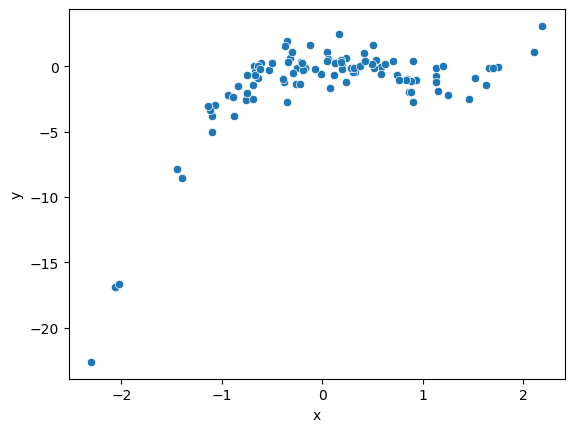

In [83]:
ax = sns.scatterplot(x=x, y=y)
plt.xlabel('x')
plt.ylabel('y')

In [85]:
def mse(y_pred, y):
    """Calculate mean squared error"""
    return np.sum(np.square(y_pred - y)) / y.size


def sim_loocv(seed):
    """Run loocv on simulated data generated with random seed provided"""
    # Generate simulated data
    np.random.seed(seed)
    mu, sigma = 0, 1 # mean and standard deviation
    x  = np.random.normal(mu, sigma, 100)
    y = ((x-2) * (x**2)) + np.random.normal(mu, sigma, 100)
    sim_df = pd.DataFrame({'x': x, 'y': y})
    
    formulae = {'x'   : 'y ~ x', 
                'x^2' : 'y ~ x + np.power(x, 2)',
                'x^3' : 'y ~ x + np.power(x, 2) + np.power(x, 3)',
                'x^4' : 'y ~ x + np.power(x, 2) + np.power(x, 3) + np.power(x, 4)'}
    
    errors = {}
    for f in formulae:
        # predictions state
        y_pred = pd.Series({})
        for i in range(sim_df.shape[0]):
            # Create index for LOOCV
            train = sim_df.index != i
            
            # Linear regression
            model_ols = smf.ols(formula=formulae[f], data=sim_df[train]).fit()
            
            ## Predict
            y_hat   = model_ols.predict(exog=sim_df[~train])
            y_pred  = pd.concat([y_pred, y_hat])
        errors[f] = mse(np.array(y_pred), y)
    
    display(HTML('<h3>MSE</h3>'))
    display(errors)
    
sim_loocv(1)

/tmp/ipykernel_3057/1522049764.py:33: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  y_pred  = pd.concat([y_pred, y_hat])
/tmp/ipykernel_3057/1522049764.py:33: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  y_pred  = pd.concat([y_pred, y_hat])
/tmp/ipykernel_3057/1522049764.py:33: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  y_pred  = pd.c

{'x': 9.710113037214064,
 'x^2': 4.169963579639428,
 'x^3': 0.9268768781648798,
 'x^4': 0.8669116865881077}

In [87]:
sim_loocv(2)

/tmp/ipykernel_3057/1522049764.py:33: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  y_pred  = pd.concat([y_pred, y_hat])
/tmp/ipykernel_3057/1522049764.py:33: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  y_pred  = pd.concat([y_pred, y_hat])
/tmp/ipykernel_3057/1522049764.py:33: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  y_pred  = pd.c

{'x': 21.444406970083293,
 'x^2': 5.635014149446474,
 'x^3': 1.2820418215169622,
 'x^4': 1.3165915804276833}

In [89]:
# Generate simulated data
np.random.seed(1)
mu, sigma = 0, 1 # mean and standard deviation
x  = np.random.normal(mu, sigma, 100)
y = ((x-2) * (x**2)) + np.random.normal(mu, sigma, 100)
sim_df = pd.DataFrame({'x': x, 'y': y})

formulae = {'x'  : 'y ~ x', 
            'x^2' : 'y ~ x + np.power(x, 2)',
            'x^3': 'y ~ x + np.power(x, 2) + np.power(x, 3)',
            'x^4' : 'y ~ x + np.power(x, 2) + np.power(x, 3) + np.power(x, 4)'}

errors = {}
for f in formulae:
    # predictions state
    y_pred = pd.Series({})
    for i in range(sim_df.shape[0]):
        # Create index for LOOCV
        train = sim_df.index != i
        
        # Linear regression
        model_ols = smf.ols(formula=formulae[f], data=sim_df[train]).fit()
        
        ## Predict
        y_hat   = model_ols.predict(exog=sim_df[~train])
        y_pred  = pd.concat([y_pred, y_hat])
    errors[f] = mse(np.array(y_pred), y)

display(model_ols.summary())

/tmp/ipykernel_3057/4156863399.py:26: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  y_pred  = pd.concat([y_pred, y_hat])
/tmp/ipykernel_3057/4156863399.py:26: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  y_pred  = pd.concat([y_pred, y_hat])
/tmp/ipykernel_3057/4156863399.py:26: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  y_pred  = pd.c

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     350.8
Date:                Wed, 29 May 2024   Prob (F-statistic):           1.42e-55
Time:                        18:00:55   Log-Likelihood:                -129.19
No. Observations:                  99   AIC:                             268.4
Df Residuals:                      94   BIC:                             281.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.3031      0.136      2.227      0.028       0.033       0.573
x                 -0.1113      0.184     -0.606      0.546      -0.476       0.253
np.power(x, 2)    -2.5461      0.248    -10.281      0.000      -3.038      -2.054
np.power(x, 3)     1.1059      0.064     17.283      0.000       0.979       1.233
np.power(x, 4)     0.1407      0.057      2.462      0.016       0.027       0.254
==============================================================================
Omnibus:                        1.519   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.468   Jarque-Bera (JB):                1.037
Skew:                          -0.225   Prob(JB):                        0.595
Kurtosis:                       3.221   Cond. No.                         15.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""